# Comparison  of Different Clustering Algorithms Applied to the Iris Data

The Iris dataset is a famous dataset in ML community. In this notebook, different clustering algorithms will be applied to Iris dataset and their performance will be compared. The algorithms we would use are:
* k-Nearest Neighbours (kNN)
* Logistic Regression
* k-means Clustering
* Decision Trees

Scikit-Learn will be employed for performing this task.

In [104]:
#import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
#from matplotlib import rc
from matplotlib.colors import ListedColormap


In [2]:
#import iris dataset as iris
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
#iris is a bunch object containing both data and target. 
#copy them as X and y, respectively
X = iris.data
y = iris.target
print(X.shape, y.shape)
print(type(X), type(y))

(150, 4) (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


There are 150 instances and 4 features for the iris dataset.

In [18]:
print(iris.feature_names)

print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Splitting Data into training and test sets

In [151]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

## kNN clustering

kNN clustering is probably the most simple clustering algorithm. For any new unclassified observation, its *k* nearest classified neighbours are determined, and it is assigned to the class which is the most-frequent class among the nearest neighbours. An input parameter for kNN is the number of neighbours *k* that we consider while assigning class. For *k*=1, the prediction could be very sensitive to training data due to overfitting. For *k* = (n_observations-1), the largest possible value, the prediction will be same for all inputs (same as the most populous class). Typically, an intermediate *k* value gives the best result. 

In [32]:
#import kNN
from sklearn.neighbors import KNeighborsClassifier


In [152]:
#calculate kNN performace for k= 1 to 99
perform_all=[]
for k in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    perform_all.append(clf.score(X_test, y_test))
#    print(k, clf.score(X_test, y_test))

(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 8 Text yticklabel objects>)

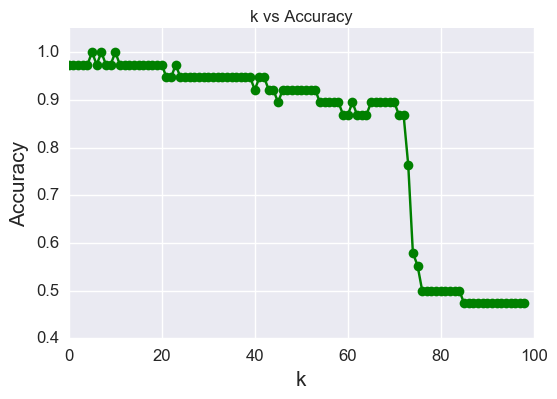

In [210]:
#plot k vs kNN performance 
plt.plot(perform_all, '-og')
plt.title('k vs Accuracy')
plt.xlabel('k' , fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim((0.4,1.05))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## Working with Low Dimensions
The kNN algorithm seems to work very well even with *k*=1. However, we used all the four features for clustering and its hard to visualize the dependency of the target on each of the four features. Also, the Iris classification is relatively simple and easy. So can we use fewer features and get similar predictive power?

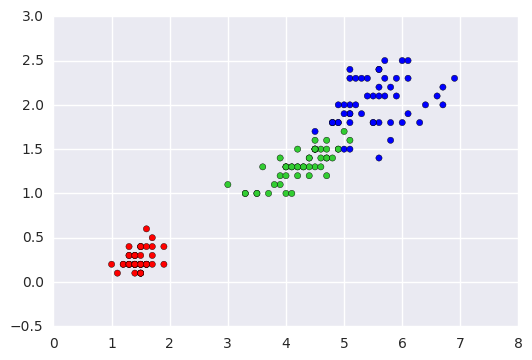

In [309]:
#we choose two columns (index1 and index2) from X. 
#iterate over indices and find the best pair
index1 = 2
index2 = 3

var1 = X[:, index1]
var2 = X[:, index2]
color = y 
cmap_bold = ListedColormap(['#FF0000', 'limegreen', '#0000FF'])
plt.scatter(var1,var2, c=color,cmap=cmap_bold)


Indices 2 and 3 separate the classes well. 

In [310]:
#Repeat kNN calculation, but this time with only 
#two features (columns 2 and 3)
X_2var = np.column_stack((var1,var2))

#split training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_2var, y, test_size=0.25, random_state=19)
perform_2var=[]

#kNN performance for different k values (1-99)
for k in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    perform_2var.append(clf.score(X_test, y_test))


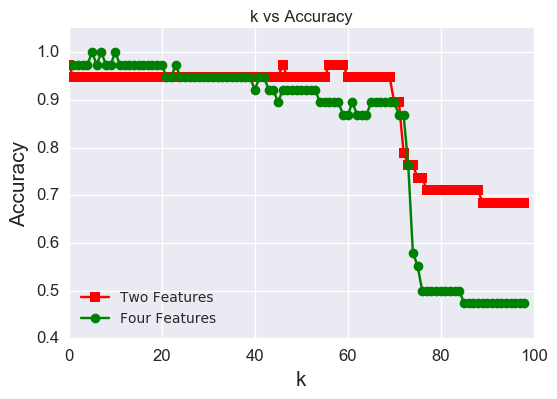

In [311]:
#compare the two graphs
plt.plot(perform_2var, '-sr', perform_all, 'o-g')
plt.title('k vs Accuracy')
plt.xlabel('k' , fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim((0.4,1.05))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Two Features','Four Features'], loc=3)#,loc=(10,0.5))

With just two features we get almost same accuracy. And for large k values (which we typically do not prefer), kNN with two features exhibit superior performance. This is because, larger the number of features, greater the likelihood of overfitting.

## Decision Boundaries

In [315]:
#train kNN again, with default value k=5
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
perform_2var.append(clf.score(X_test, y_test))

In [313]:
#make a mesh of petal length and width values
#and predict the class for each meshpoint

#size of cells
w = 0.02

xm = np.arange(min(var1)-0.5, max(var1)+0.5, w)
ym = np.arange(min(var2)-0.5, max(var2)+0.5, w)

xx, yy = np.meshgrid(xm,ym)

zz = clf.predict(np.c_[xx.ravel(),yy.ravel()])
zz=zz.reshape(xx.shape)

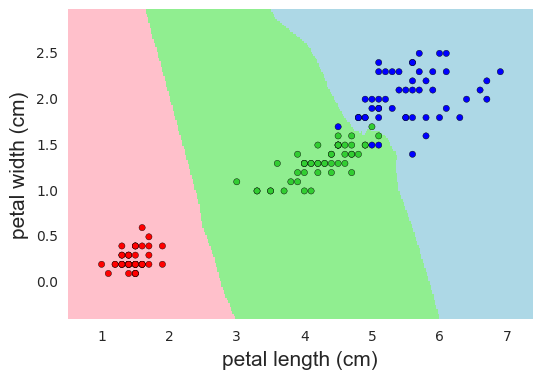

In [314]:
cmap_light = ListedColormap([ 'pink','lightgreen', 'lightblue'])

plt.pcolormesh(xx, yy, zz, cmap=cmap_light)
plt.scatter(var1,var2, c=y,cmap=cmap_bold)
xx.shape
plt.xlim(xx[0,0], xx[0,-1])
plt.ylim(yy[0,0], yy[-1,0])
plt.xlabel(iris.feature_names[index1], fontsize=15)
plt.ylabel(iris.feature_names[index2], fontsize=15)